#### First create an empty dataframe with rows for each day, then fill it with the sales data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a dataframe with rows for every day in the year 2020 to 2022
df = pd.DataFrame(pd.date_range('2020-01-01', '2022-12-31', ), columns=['date'])

# Create a column for the day of the week
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df['week_of_year'] = df['date'].dt.isocalendar().week

# save this dataframe as a csv file
df.to_csv('processed_data/dates.csv', index=False)
df


,date,day_of_week,month,year,week_of_year
0,2020-01-01,Wednesday,January,2020,1
1,2020-01-02,Thursday,January,2020,1
2,2020-01-03,Friday,January,2020,1
3,2020-01-04,Saturday,January,2020,1
4,2020-01-05,Sunday,January,2020,1
...,...,...,...,...,...
1091,2022-12-27,Tuesday,December,2022,52
1092,2022-12-28,Wednesday,December,2022,52
1093,2022-12-29,Thursday,December,2022,52
1094,2022-12-30,Friday,December,2022,52


In [3]:
import io
import pandas as pd
def add_delimiters(fpath, delimiter=','):
    """
    Add delimiters to a file that is missing them.
    modified from https://stackoverflow.com/questions/52861571/pandas-read-csv-load-data-with-irregular-rows
    """
    s_data = ''
    max_num_delimiters = 0
    # use encoding='utf-8-sig' when opring a csv file with special characters
    with open(fpath, 'r', encoding="utf-8-sig") as f:
        for line in f:
            s_data += line
            delimiter_count = line.count(delimiter)
            if delimiter_count > max_num_delimiters:
                max_num_delimiters = delimiter_count

    s_delimiters = delimiter * max_num_delimiters + '\n'
    return io.StringIO(s_delimiters + s_data)

#### Load a single file to get the names of the relevatn rows/columns/variables

In [4]:
import os

# load one day to get names of all categories
data_dir_jan = os.path.join('raw_data', '2022', '01jan')
data_names_jan = os.listdir(data_dir_jan)
data = pd.read_csv(add_delimiters(os.path.join(data_dir_jan, data_names_jan[0]), delimiter=';'), sep=';', encoding="utf-8")

total_sales_index = "Unnamed: 3"
total_count_index = "Unnamed: 2"
category_index = "Unnamed: 0"

main_categories = data[category_index][61:64].values
print("main_categories", main_categories)
all_categories = data[category_index][66:75].values # TODO this might not be all categoriess
print("all_categories", all_categories)

# create a new column in the df for each category in all_categories and main_categories
for list in (main_categories, all_categories):
    for category in list:
        print(category)
        df[category + "_sales"] = 0
        df[category + "_count"] = 0

df

main_categories ['Getränke' 'Speisen' 'Sonstiges']
all_categories ['Milchmischgetränke' 'Hafer' 'Speisen' 'Röstkaffee' 'Kaffee' 'Non Kaffee'
 'Equipment_' 'Summer' 'Decaf']
Getränke
Speisen
Sonstiges
Milchmischgetränke
Hafer
Speisen
Röstkaffee
Kaffee
Non Kaffee
Equipment_
Summer
Decaf


,date,day_of_week,month,year,week_of_year,Getränke_sales,Getränke_count,Speisen_sales,Speisen_count,Sonstiges_sales,...,Kaffee_sales,Kaffee_count,Non Kaffee_sales,Non Kaffee_count,Equipment__sales,Equipment__count,Summer_sales,Summer_count,Decaf_sales,Decaf_count
0,2020-01-01,Wednesday,January,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-02,Thursday,January,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-03,Friday,January,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-04,Saturday,January,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-05,Sunday,January,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2022-12-27,Tuesday,December,2022,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1092,2022-12-28,Wednesday,December,2022,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1093,2022-12-29,Thursday,December,2022,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1094,2022-12-30,Friday,December,2022,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Now load the sales data for all years

In [6]:
# load the data for each day and add it to the df
# for the main categories

years = ["2021", "2022"]
months = ["01jan", "02feb", "03mar", "04apr", "05may", "06jun", "07jul", "08aug", "09sep", "10oct", "11nov", "12dec"]

for year in years :
    for month in months :
        data_dir = os.path.join('raw_data', year, month)
        data_names = os.listdir(data_dir)
        for day_file in data_names:
            data = pd.read_csv(add_delimiters(os.path.join(data_dir, day_file), delimiter=';'), sep=';', encoding="utf-8")
            data_date = data["Unnamed: 1"][1]
            data_date = pd.to_datetime(data_date, format='%d.%m.%Y').strftime('%Y-%m-%d')
            for category in main_categories :
                df.loc[df['date'] == data_date, category + "_sales"] = data[data[category_index] == category][total_sales_index].values[0]
                df.loc[df['date'] == data_date, category + "_count"] = data[data[category_index] == category][total_count_index].values[0]

df

,date,day_of_week,month,year,week_of_year,Getränke_sales,Getränke_count,Speisen_sales,Speisen_count,Sonstiges_sales,...,Kaffee_sales,Kaffee_count,Non Kaffee_sales,Non Kaffee_count,Equipment__sales,Equipment__count,Summer_sales,Summer_count,Decaf_sales,Decaf_count
0,2020-01-01,Wednesday,January,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-02,Thursday,January,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-03,Friday,January,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-04,Saturday,January,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-05,Sunday,January,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2022-12-27,Tuesday,December,2022,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1092,2022-12-28,Wednesday,December,2022,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1093,2022-12-29,Thursday,December,2022,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1094,2022-12-30,Friday,December,2022,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# drop all rows where no sales were made/are not available
df = df[df["Getränke_sales"] != 0]
df

,date,day_of_week,month,year,week_of_year,Getränke_sales,Getränke_count,Speisen_sales,Speisen_count,Sonstiges_sales,...,Kaffee_sales,Kaffee_count,Non Kaffee_sales,Non Kaffee_count,Equipment__sales,Equipment__count,Summer_sales,Summer_count,Decaf_sales,Decaf_count
367,2021-01-02,Saturday,January,2021,53,692.90,486,125.40,43,424.25,...,0,0,0,0,0,0,0,0,0,0
369,2021-01-04,Monday,January,2021,1,429.20,297,37.00,15,265.00,...,0,0,0,0,0,0,0,0,0,0
370,2021-01-05,Tuesday,January,2021,1,392.80,309,54.40,19,243.50,...,0,0,0,0,0,0,0,0,0,0
372,2021-01-07,Thursday,January,2021,1,493.20,290,34.60,12,445.75,...,0,0,0,0,0,0,0,0,0,0
373,2021-01-08,Friday,January,2021,1,557.50,350,50.60,16,280.50,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2022-12-12,Monday,December,2022,50,914.30,382,255.40,73,473.25,...,0,0,0,0,0,0,0,0,0,0
1077,2022-12-13,Tuesday,December,2022,50,713.00,245,183.40,53,445.20,...,0,0,0,0,0,0,0,0,0,0
1078,2022-12-14,Wednesday,December,2022,50,666.10,253,183.80,52,669.10,...,0,0,0,0,0,0,0,0,0,0
1079,2022-12-15,Thursday,December,2022,50,655.00,220,231.90,70,981.50,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# save the df as a csv file
df.to_csv('processed_data/sales_suedhang_2021_2022.csv', index=False)

# play around with some plots

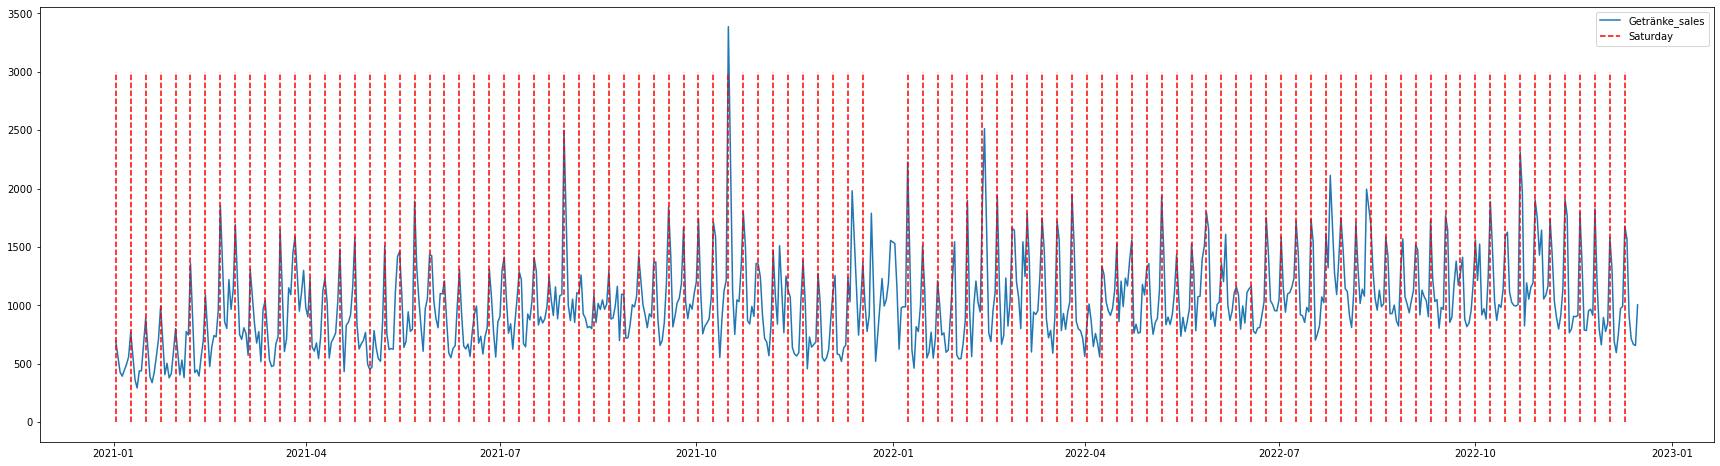

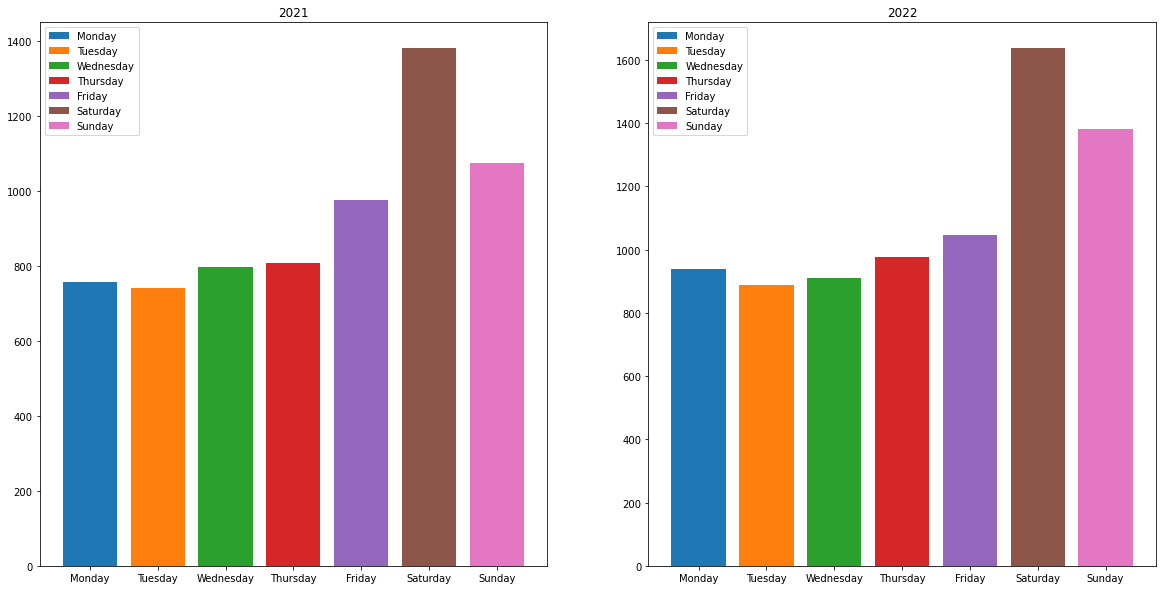

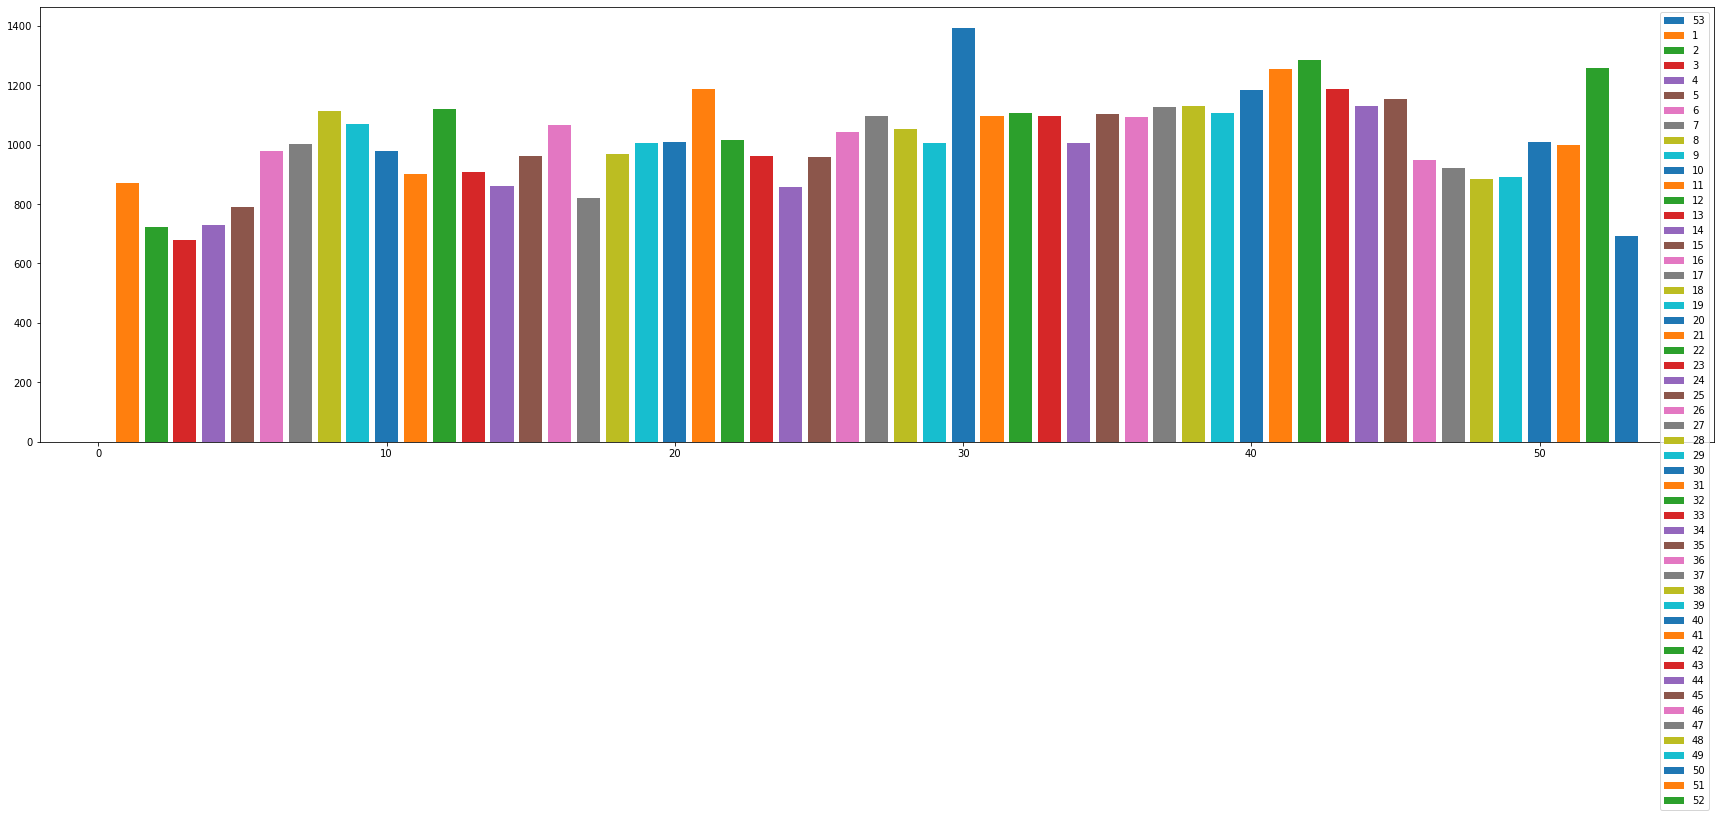

In [9]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(30, 8))
ax.plot(df["date"].astype("datetime64"), df["Getränke_sales"].astype("float"))
# add a vline where the day of the week is Saturday
ax.vlines(df[df["day_of_week"] == "Saturday"]["date"].astype("datetime64"), 0, 3000, colors='r', linestyles='dashed')
# add a legend
ax.legend(["Getränke_sales", "Saturday"])

# plot an histogram where on the x axis are the seven days of the week and on the y axis the sales, avereaged over all months, in two subplots for each year
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

for year in df["year"].unique():
  
    for day in days:
        ax[int(year) - 2021].bar(day, df[(df["day_of_week"] == day) & (df["year"] == year)]["Getränke_sales"].astype("float").mean(), label=day)

        ax[int(year) - 2021].set_title(year)
        ax[int(year) - 2021].legend()


# plot the mean sales of each week in the year
fig, ax = plt.subplots(figsize=(30, 8))
for week in df["week_of_year"].unique():
    ax.bar(week, df[df["week_of_year"] == week]["Getränke_sales"].astype("float").mean(), label=week)
ax.legend()


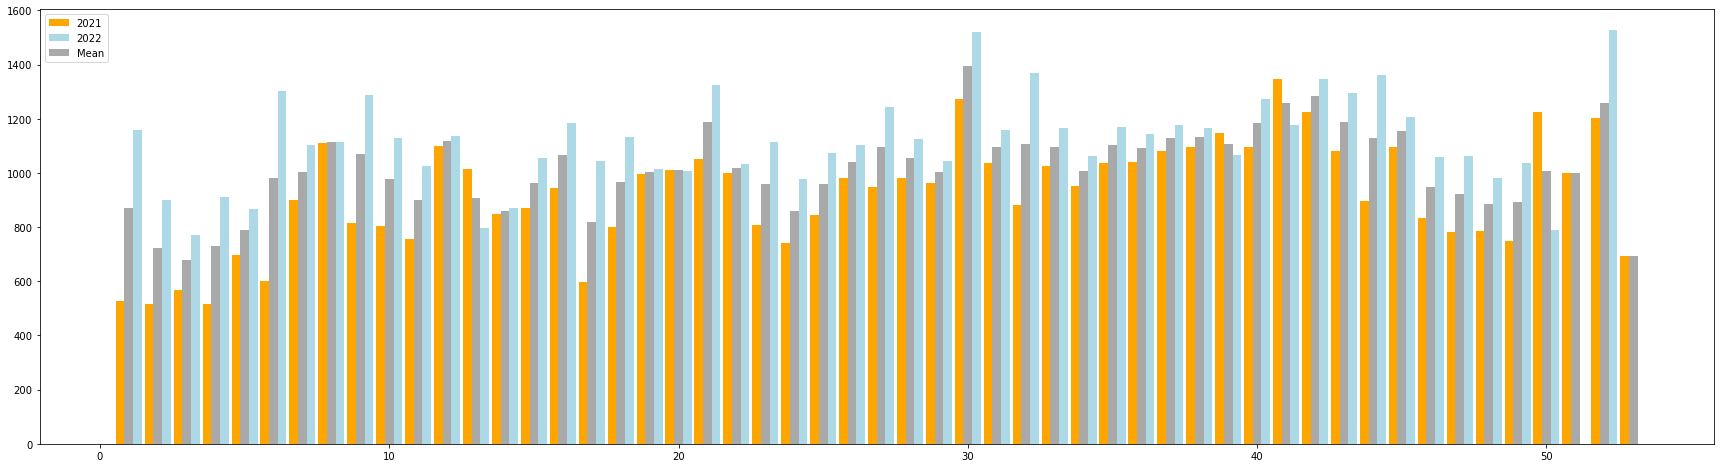

In [10]:
# plot a bar graph where on the x axis are the weeks of the year and on the y axis the sales, each bar is split for 2021 and 2022
fig, ax = plt.subplots(figsize=(30, 8))

width = 0.3
for week in df["week_of_year"].unique():
    ax.bar(week - width, df[(df["week_of_year"] == week) & (df["year"] == 2021)]["Getränke_sales"].astype("float").mean(), width, color="orange")
    ax.bar(week + width, df[(df["week_of_year"] == week) & (df["year"] == 2022)]["Getränke_sales"].astype("float").mean(), width, color="lightblue")
    ax.bar(week, df[df["week_of_year"] == week]["Getränke_sales"].astype("float").mean(), width, color="darkgrey")
ax.legend(["2021", "2022", "Mean"])

plt.show()



Text(0.5, 1.0, 'Fridays sales')

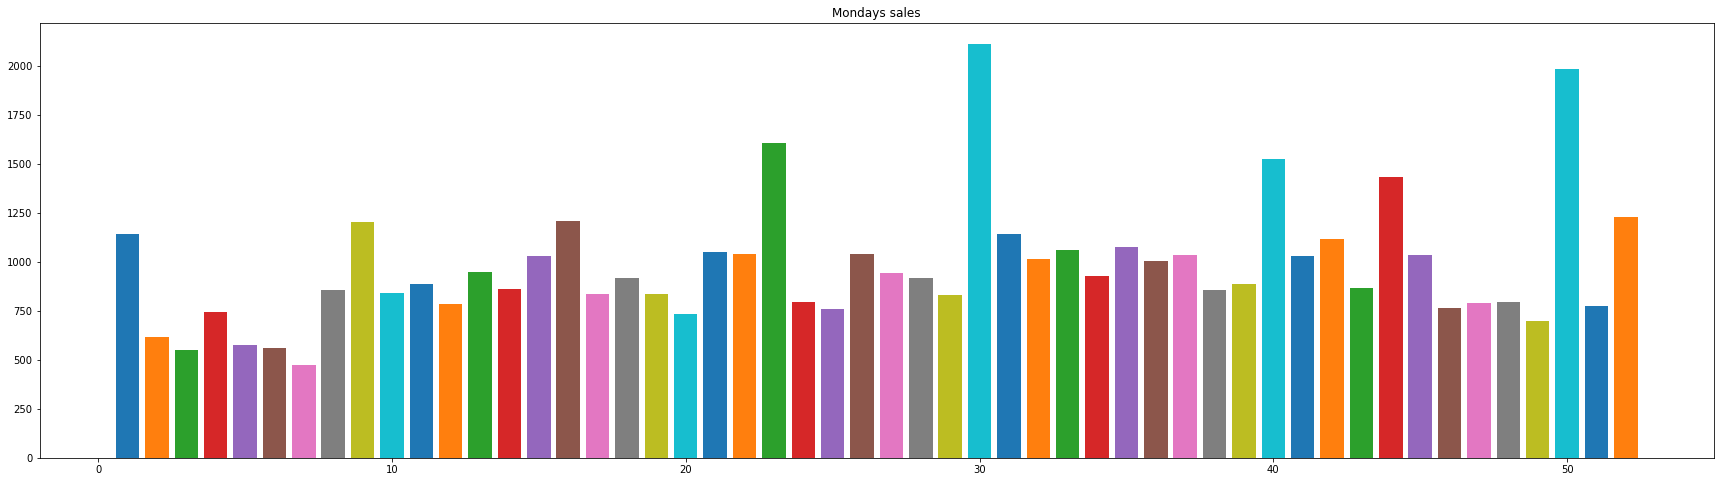

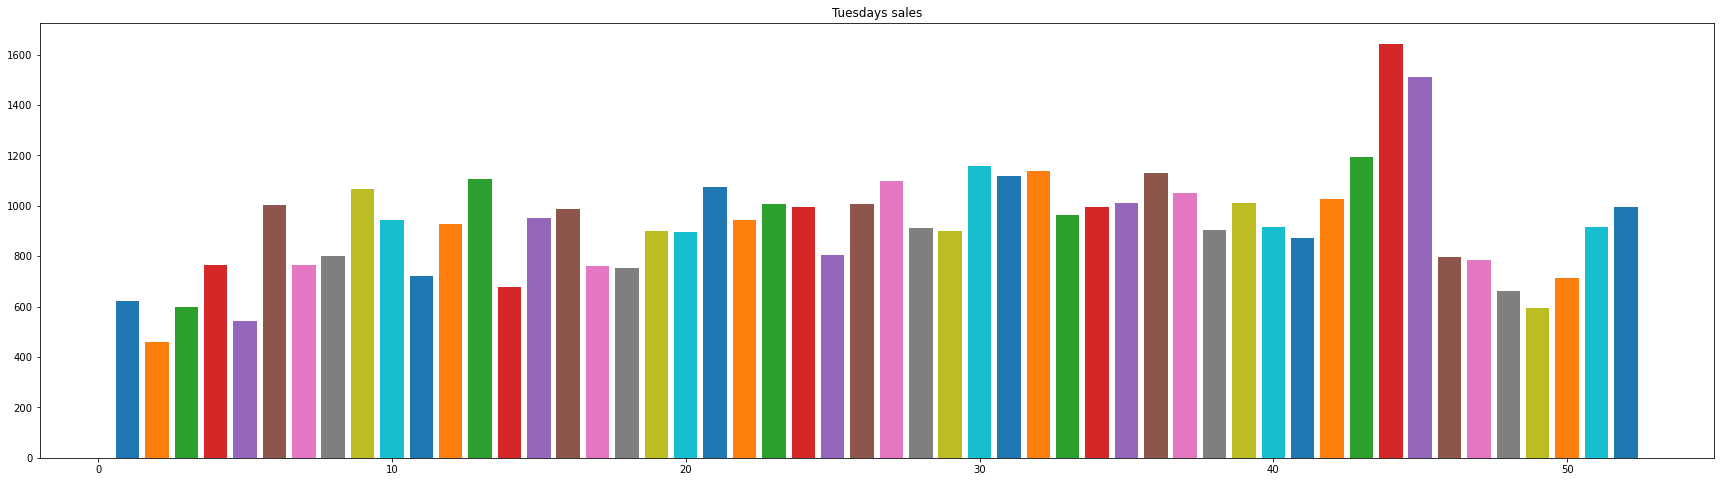

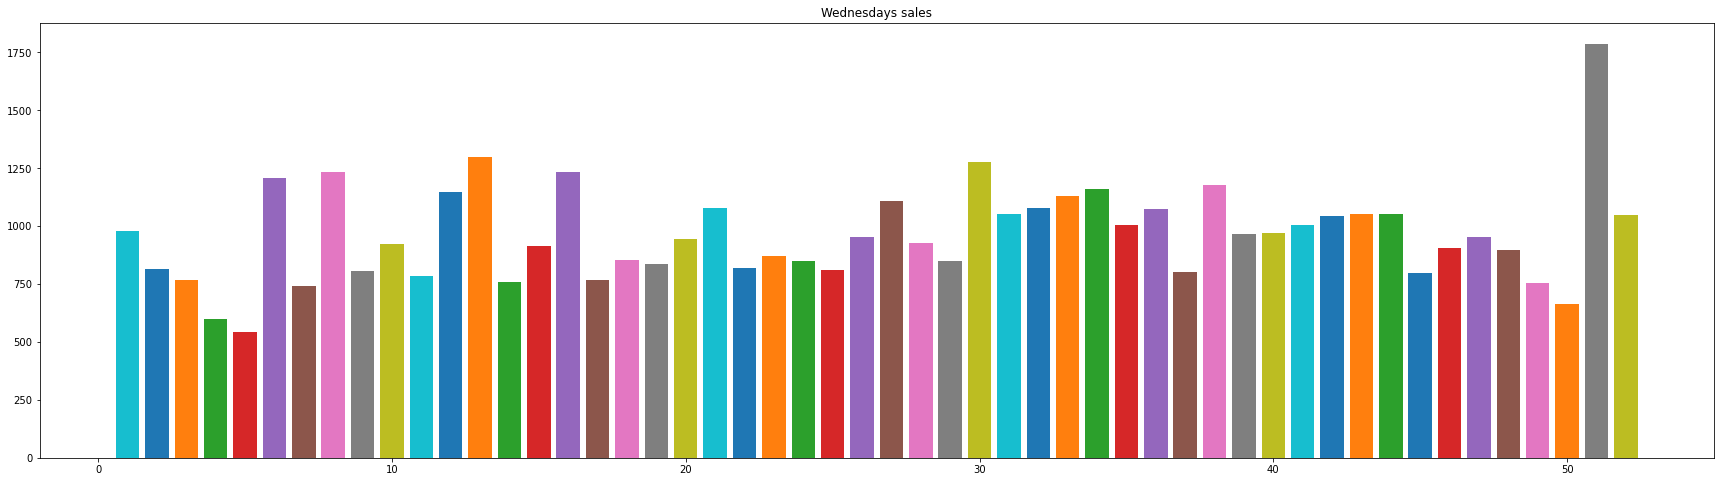

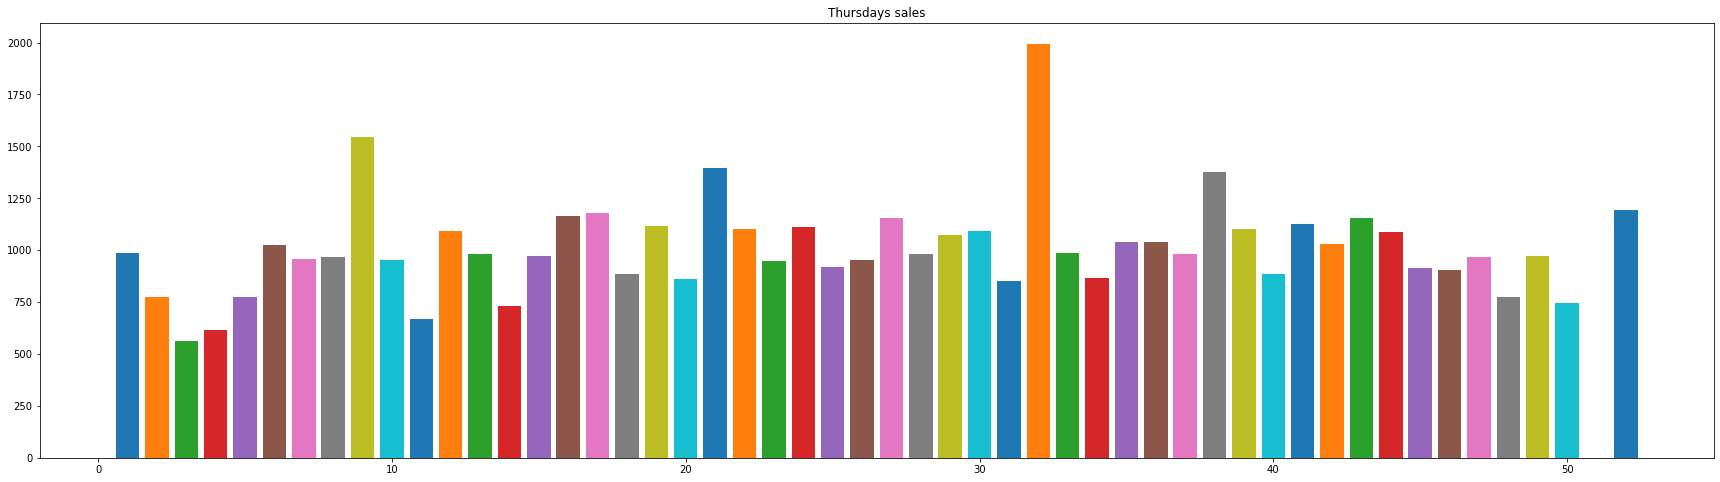

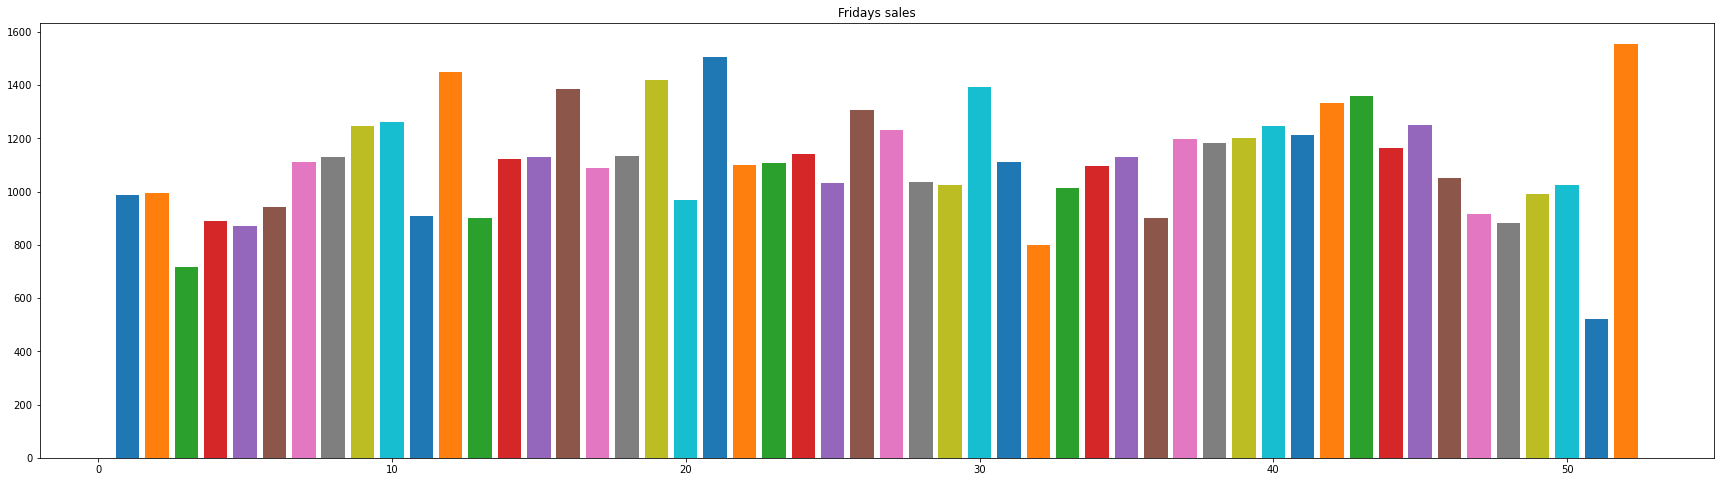

In [11]:
# plot the sales for each monday in the year
fig, ax = plt.subplots(figsize=(30, 8))
for week in df[df["day_of_week"] == "Monday"]["week_of_year"].unique():
    ax.bar(week, df[(df["week_of_year"] == week) & (df["day_of_week"] == "Monday")]["Getränke_sales"].astype("float"), label=week)
plt.title("Mondays sales")

# plot the sales for each tuesday in the year
fig, ax = plt.subplots(figsize=(30, 8))
for week in df[df["day_of_week"] == "Tuesday"]["week_of_year"].unique():
    ax.bar(week, df[(df["week_of_year"] == week) & (df["day_of_week"] == "Tuesday")]["Getränke_sales"].astype("float"), label=week)
plt.title("Tuesdays sales")

# plot the sales for each wednesday in the year
fig, ax = plt.subplots(figsize=(30, 8))
for week in df[df["day_of_week"] == "Wednesday"]["week_of_year"].unique():
    ax.bar(week, df[(df["week_of_year"] == week) & (df["day_of_week"] == "Wednesday")]["Getränke_sales"].astype("float"), label=week)
plt.title("Wednesdays sales")

# plot the sales for each thursday in the year
fig, ax = plt.subplots(figsize=(30, 8))
for week in df[df["day_of_week"] == "Thursday"]["week_of_year"].unique():
    ax.bar(week, df[(df["week_of_year"] == week) & (df["day_of_week"] == "Thursday")]["Getränke_sales"].astype("float"), label=week)
plt.title("Thursdays sales")

# plot the sales for each friday in the year
fig, ax = plt.subplots(figsize=(30, 8))
for week in df[df["day_of_week"] == "Friday"]["week_of_year"].unique():
    ax.bar(week, df[(df["week_of_year"] == week) & (df["day_of_week"] == "Friday")]["Getränke_sales"].astype("float"), label=week)
plt.title("Fridays sales")